# Dimensionality Reduction

#Source: https://stackabuse.com/dimensionality-reduction-in-python-with-scikit-learn/

# PCA Implementation Example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
m_data = pd.read_csv('data/mushrooms.csv')

# Machine learning systems work with integers, we need to encode these
# string characters into ints

encoder = LabelEncoder()

# Now apply the transformation to all the columns:
for col in m_data.columns:
    m_data[col] = encoder.fit_transform(m_data[col])

X_features = m_data.iloc[:,1:23]
y_label = m_data.iloc[:, 0]

In [3]:
# Scale the features
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

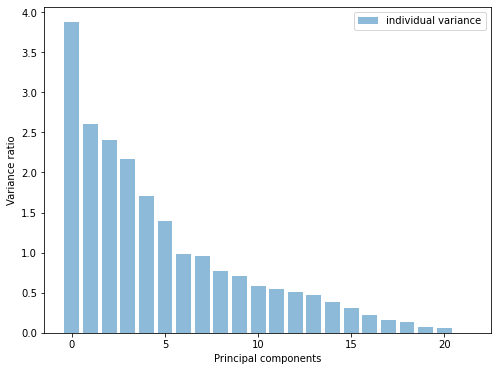

In [4]:
# Visualize
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(22), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

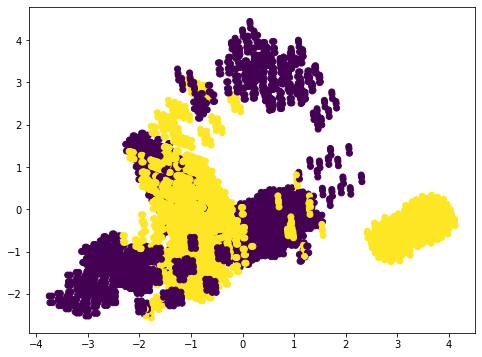

In [5]:
pca2 = PCA(n_components=17)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,5], c=m_data['class'])
plt.show()

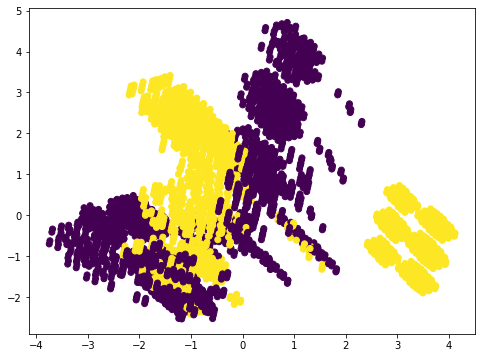

In [6]:
pca3 = PCA(n_components=2)
pca3.fit(X_features)
x_3d = pca3.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1], c=m_data['class'])
plt.show()

# Singular Value Decomposition

In [7]:
import numpy
from PIL import Image

def load_image(image):
    image = Image.open(image)
    im_array = numpy.array(image)

    red = im_array[:, :, 0]
    green = im_array[:, :, 1]
    blue = im_array[:, :, 2]

    return red, green, blue

In [8]:
def channel_compress(color_channel, singular_value_limit):
    u, s, v = numpy.linalg.svd(color_channel)
    compressed = numpy.zeros((color_channel.shape[0], color_channel.shape[1]))
    n = singular_value_limit

    left_matrix = numpy.matmul(u[:, 0:n], numpy.diag(s)[0:n, 0:n])
    inner_compressed = numpy.matmul(left_matrix, v[0:n, :])
    compressed = inner_compressed.astype('uint8')
    return compressed

red, green, blue = load_image("data/dog.jpg")
singular_val_lim = 350

In [9]:
def compress_image(red, green, blue, singular_val_lim):
    compressed_red = channel_compress(red, singular_val_lim)
    compressed_green = channel_compress(green, singular_val_lim)
    compressed_blue = channel_compress(blue, singular_val_lim)

    im_red = Image.fromarray(compressed_red)
    im_blue = Image.fromarray(compressed_blue)
    im_green = Image.fromarray(compressed_green)

    new_image = Image.merge("RGB", (im_red, im_green, im_blue))
    new_image.show()
    new_image.save("images/dog-edited.jpg")

compress_image(red, green, blue, singular_val_lim)

In [10]:
red, green, blue = load_image("data/dog.jpg")
singular_val_lim = 350

In [11]:
def compress_image(red, green, blue, singular_val_lim):
    compressed_red = channel_compress(red, singular_val_lim)
    compressed_green = channel_compress(green, singular_val_lim)
    compressed_blue = channel_compress(blue, singular_val_lim)

    im_red = Image.fromarray(compressed_red)
    im_blue = Image.fromarray(compressed_blue)
    im_green = Image.fromarray(compressed_green)

    new_image = Image.merge("RGB", (im_red, im_green, im_blue))
    new_image.show()

compress_image(red, green, blue, singular_val_lim)

# Linear Discriminant Analysis

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
training_data = pd.read_csv("data/titanic_train.csv")

# Let's drop the cabin and ticket columns
training_data.drop(labels=['Cabin', 'Ticket'], axis=1, inplace=True)

training_data["Age"].fillna(training_data["Age"].median(), inplace=True)
training_data["Embarked"].fillna("S", inplace=True)

In [14]:
encoder_1 = LabelEncoder()

# Fit the encoder on the data
encoder_1.fit(training_data["Sex"])

# Transform and replace the training data
training_sex_encoded = encoder_1.transform(training_data["Sex"])
training_data["Sex"] = training_sex_encoded

encoder_2 = LabelEncoder()
encoder_2.fit(training_data["Embarked"])

training_embarked_encoded = encoder_2.transform(training_data["Embarked"])
training_data["Embarked"] = training_embarked_encoded

# Assume the name is going to be useless and drop it
training_data.drop("Name", axis=1, inplace=True)

In [15]:
# Remember that the scaler takes arrays
ages_train = np.array(training_data["Age"]).reshape(-1, 1)
fares_train = np.array(training_data["Fare"]).reshape(-1, 1)

scaler = StandardScaler()

training_data["Age"] = scaler.fit_transform(ages_train)
training_data["Fare"] = scaler.fit_transform(fares_train)

# Now to select our training and testing data
features = training_data.drop(labels=['PassengerId', 'Survived'], axis=1)
labels = training_data['Survived']

In [16]:
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=27)

model = LDA()
model.fit(X_train, y_train)
preds = model.predict(X_val)
acc = accuracy_score(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy: {}".format(acc))
print("F1 Score: {}".format(f1))

Accuracy: 0.8100558659217877
F1 Score: 0.734375


In [17]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
preds = logreg_clf.predict(X_val)
acc = accuracy_score(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy: {}".format(acc))
print("F1 Score: {}".format(f1))

Accuracy: 0.8212290502793296
F1 Score: 0.7538461538461538


In [18]:
LDA_transform = LDA(n_components=1)
LDA_transform.fit(features, labels)
features_new = LDA_transform.transform(features)

# Print the number of features
print('Original feature #:', features.shape[1])
print('Reduced feature #:', features_new.shape[1])

# Print the ratio of explained variance
print(LDA_transform.explained_variance_ratio_)

Original feature #: 7
Reduced feature #: 1
[1.]


In [19]:
X_train, X_val, y_train, y_val = train_test_split(features_new, labels, test_size=0.2, random_state=27)

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
preds = logreg_clf.predict(X_val)
acc = accuracy_score(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy: {}".format(acc))
print("F1 Score: {}".format(f1))

Accuracy: 0.8212290502793296
F1 Score: 0.7500000000000001


______________________________________________________________________________________________________________________________

In [20]:
#Source: https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/

In [21]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)
# synthetic classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

0.23.1
(1000, 20) (1000,)


In [22]:
# evaluate logistic regression model on raw data
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the model
model = LogisticRegression()
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


In [23]:
#Principal Component Analysis

# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


In [24]:
#Singular Value Decomposition

# evaluate svd with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


In [25]:
#Linear Discriminant Analysis

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.825 (0.034)


In [26]:
#Isomap Embedding

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import Isomap
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('iso', Isomap(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.888 (0.029)


In [27]:
# Locally Linear Embedding

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.886 (0.028)


In [28]:
# Modified Locally Linear Embedding

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=5, method='modified', n_neighbors=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.848 (0.036)
